### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy.random as npr

In [ ]:
m = np.arange(12).reshape((3,4))

print("row: ", m.shape[0])
print("column: ", m.shape[1])
print("mean: ", m.mean())

2\. Find the outer product of the following two vectors

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations


In [ ]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v))

print(np.array([i*j for i in u for j in v]).reshape(len(u),len(v)))

print(np.tile(u,(len(u),1)).T*np.tile(v,(len(v),1)))

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
np.random.seed(38475)
a = np.random.rand(10,6)

for i in range(0,10):
    if np.any(a[i]<0.1)==0:
        a[i]=0

print(a)

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [ ]:
a = np.linspace(0, 2*np.pi, 100)

print(a[::10])
print(a[::-1])
b = a[np.abs(np.cos(a)-np.sin(a))<0.1]

%matplotlib inline 

y1 = np.sin(b)
y2 = np.cos(b)
y1tot = np.sin(a)
y2tot = np.cos(a)
plt.scatter(a, y1tot, color='r')
plt.scatter(a, y2tot, color='y')
plt.scatter(b, y1, color='k')
plt.scatter(b, y2, color='g')
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [ ]:
a = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape((10,10))

print(np.array([a[i][i] for i in range(0,10)]).sum())
print(np.array([a[9-i][i] for i in range(0,10)]))
print(np.array(np.array(np.tril(np.triu(a,1),1))[np.array(np.tril(np.triu(a,1),1))!=0]))

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

grid = np.array([np.abs(i-j) for i in miles for j in miles]).reshape((10,10))

km_grid = grid*1.6

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Construct a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [ ]:
N=10000
a = np.array([True for i in range(0,N)])
b = np.arange(N)

start = time.perf_counter()
for i in b:
    for j in range(2,int(i/2)+1):
        if i % j == 0:
            a[i]=False
end = time.perf_counter()
print(b[a])
print("time ", end-start)

a = np.array([True for i in range(0,N)])

start = time.perf_counter()
for i in range(2,N):
    if a[i]==True:
        for j in range(i,int(N/i)+1):
            if i*j < N:
                a[j*i]=False
end = time.perf_counter()            
print(b[a])
print("time ", end-start)

# with N=100 the difference in time performances between the two algorithms is around a factor of 5, but increasing
# N leads to a factor of hundreds or thousands times for N=1000 and N=10000 respectively

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [ ]:
npr.seed(203984)
w = 1000
s = 200

walsteps = npr.randint(0,2, size=(w,s))
walsteps = walsteps*2-1
paths = np.array([[walsteps[j][0:i+1:1].sum() for i in range(s)] for j in range(w)])
sq = paths**2
means = np.array([(sq.T)[i].mean() for i in range(s)])
time = np.array([i+1 for i in range(s)])
dist = means**0.5

%matplotlib inline

plt.scatter(time, dist)
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [ ]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

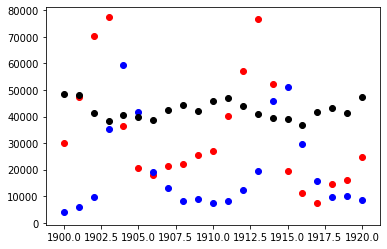

hares mean  34080.95238095238
lynxes mean  20166.666666666668
carrots mean  42400.0
hares std  20897.906458089667
lynxes std  16254.591536908763
carrots std  3322.5062255844787
correlation coeff h-l  [[1.         0.07189206]
 [0.07189206 1.        ]]
correlation coeff c-l  [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]
correlation coeff h-c  [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]


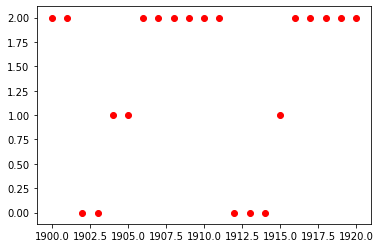

In [38]:
table = np.fromfile("populations.txt", dtype=float, count=-1, sep=" ", offset=0).reshape(21,4)
#I have removed the first line

year = np.array(table.T[0])
hares = np.array(table.T[1])
lynxes = np.array(table.T[2])
carrots = np.array(table.T[3])

%matplotlib inline

plt.scatter(year, hares, c='r')
plt.scatter(year, lynxes, c='b')
plt.scatter(year, carrots, c='k')
plt.show()

print("hares mean ", hares.mean())
print("lynxes mean ", lynxes.mean())
print("carrots mean ", carrots.mean())
print("hares std ", hares.std())
print("lynxes std ", lynxes.std())
print("carrots std ", carrots.std())
print("correlation coeff h-l ", np.corrcoef(np.array([hares, lynxes])))
print("correlation coeff c-l ", np.corrcoef(np.array([carrots, lynxes])))
print("correlation coeff h-c ", np.corrcoef(np.array([hares, carrots])))

top = np.array([table[i][1:4:1].argmax() for i in range(len(year))])

%matplotlib inline

plt.scatter(year, top, c='r')
plt.show()

In [ ]:
#the correlation is quite evident both in the oscillating shape of the plots and in the correlation matrices